In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [6]:
data= pd.read_csv('insurance.csv')

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [10]:
data.shape

(1338, 7)

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data.info() #three data types are used and count of each columns is same

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
data.isnull().sum()  #there is no any null values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
data.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

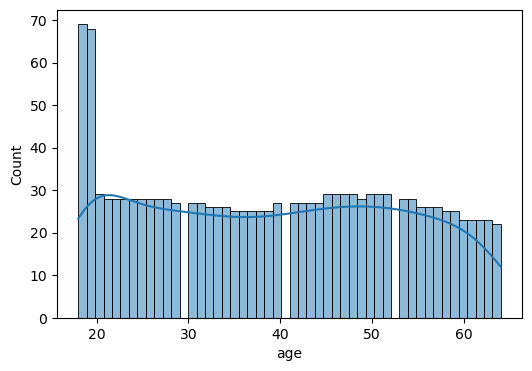

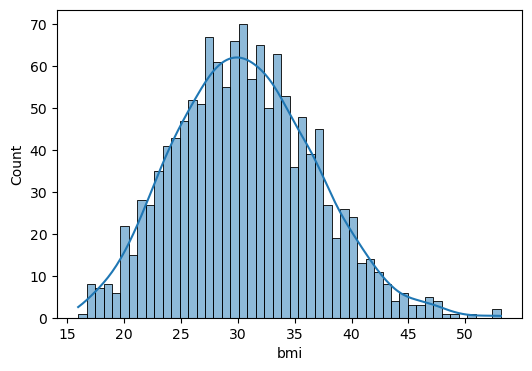

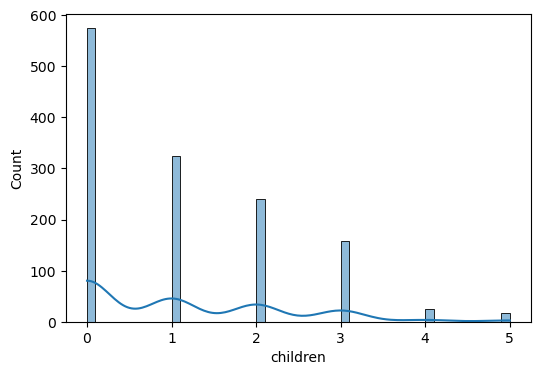

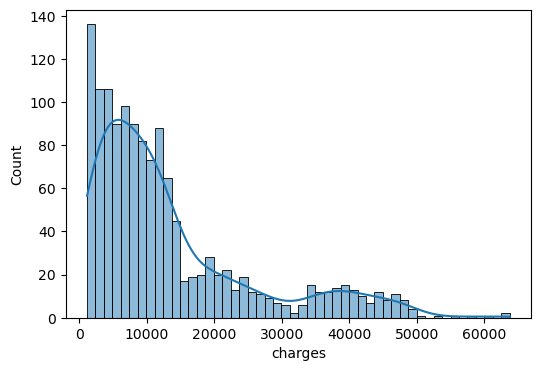

In [28]:
numeric_columns=['age','bmi','children','charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde= True, bins=50)

#in this we get to know that small age children is more that's why insurance plan with less price is mostly subscribed

<Axes: xlabel='children', ylabel='count'>

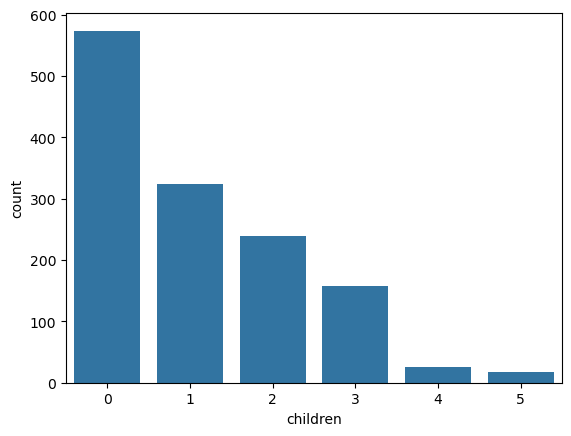

In [29]:
sns.countplot(x=data['children']) 

<Axes: xlabel='smoker', ylabel='count'>

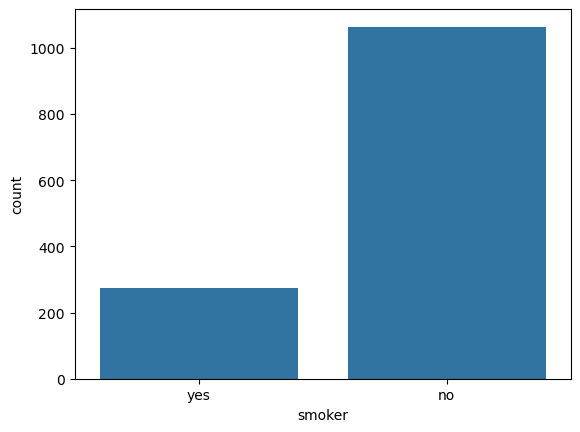

In [30]:
sns.countplot(x=data['smoker']) # smoker count is less but people who smoke may have high insurance charges

<Axes: xlabel='sex', ylabel='count'>

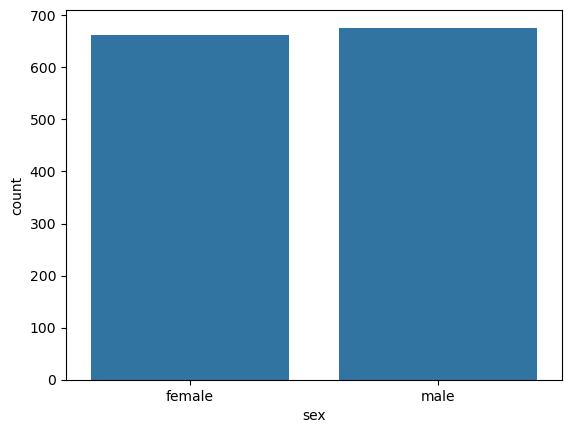

In [32]:
sns.countplot(x=data['sex']) #equal sex people are there 

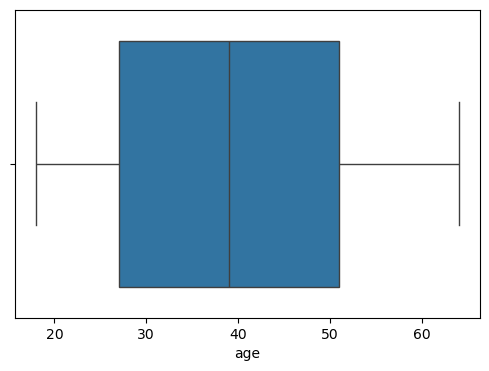

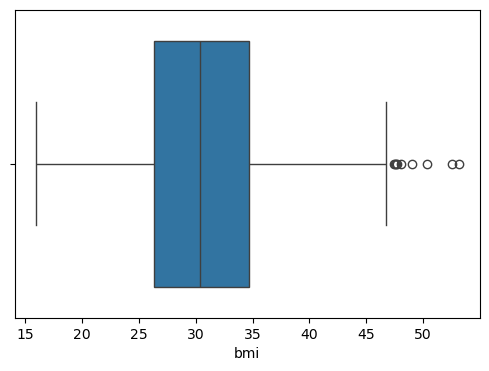

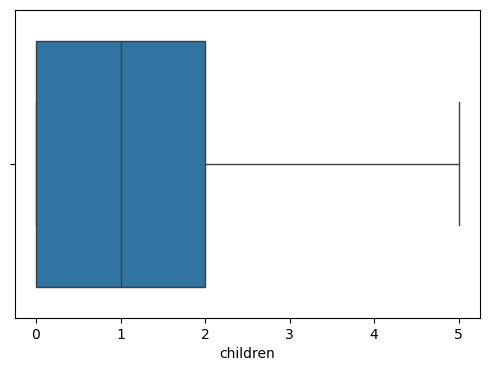

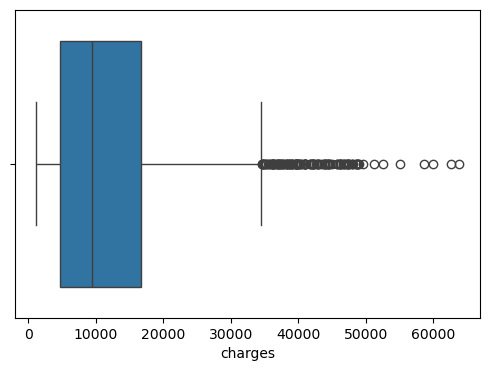

In [33]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])

<Axes: >

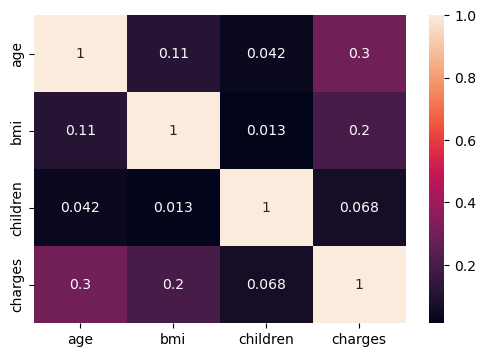

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(numeric_only=True),annot=True)

#children and charges are highly corelated....

# Data Cleaning And Data Processing 

In [134]:
data_cleaned= data.copy() #we preserve our main data make a copy of main data for any further cleaning and processing

In [135]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [136]:
data_cleaned.shape  #for now we have 1338 rows

(1338, 7)

In [137]:
data_cleaned.drop_duplicates(inplace=True)

In [138]:
data_cleaned.shape #we can see that there was 1 duplicate value and we have successfully deleted that duplicate value...

(1337, 7)

In [139]:
data_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [140]:
data_cleaned['sex'].value_counts()
# now as we know in machine learning model building we have to give only numeric data only
# so we will convert object into int data type using label encoding and one hot encoding...

sex
male      675
female    662
Name: count, dtype: int64

In [141]:
data_cleaned['sex']= data_cleaned['sex'].map({"male":0,"female":1})  #here we are using label encoding
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [142]:
data_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [143]:
data_cleaned['smoker']= data_cleaned['smoker'].map({"no":0,"yes":1}) #label encoding
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [144]:
data_cleaned.rename(columns={'sex':'is_female','smoker':'is_smoker'},inplace=True) #renaming our columns

In [145]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [146]:
data_cleaned= pd.get_dummies(data_cleaned,columns=['region'],drop_first=True)  #one hot coding

In [147]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [148]:
data_cleaned= data_cleaned.astype(int)
data_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering And Extraction

<Axes: xlabel='bmi', ylabel='Count'>

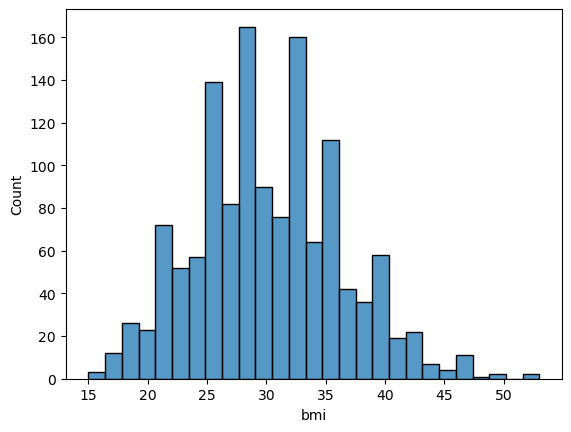

In [149]:
sns.histplot(data_cleaned['bmi'])

In [150]:
data_cleaned['bmi category']=pd.cut (
    data_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
)

#in above code we did feature enegineering of bmi columns to classify the values into different bmi category
          

In [151]:
data_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [152]:
data_cleaned['bmi category'].value_counts()

bmi category
Obese          706
Overweight     386
Normal         221
Underweight     24
Name: count, dtype: int64

In [153]:
#now we will do one hot coding of bmi category 
data_cleaned= pd.get_dummies(data_cleaned,columns=['bmi category'],drop_first=True)  #one hot coding
data_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi category_Normal,bmi category_Overweight,bmi category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [154]:
#now we will the covert boolean data into numeric data
data_cleaned= data_cleaned.astype(int)
data_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi category_Normal,bmi category_Overweight,bmi category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [155]:
data_cleaned.columns #list of all columns in our table now.. ok everything is perfect now we have to do feature scaling because we will apply linear regression model over this dataset 

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi category_Normal', 'bmi category_Overweight', 'bmi category_Obese'],
      dtype='object')

In [156]:
# for feature scaling we have to import StandardScaler function from sklearn
# feature scaling brings down any numeric value into the range from -3 to 3 by the use of standard derivation.
from sklearn.preprocessing import StandardScaler
cols= ['age','bmi','children']
scaler= StandardScaler()
data_cleaned[cols]= scaler.fit_transform(data_cleaned[cols])


In [157]:
data_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi category_Normal,bmi category_Overweight,bmi category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


In [159]:
# now we will do extraction based on the corelation of each feature with targeted values...

from scipy.stats import pearsonr

selected_features= [    #selecting all the feature which we have to correlate with the targeted value
    'age','bmi','children','is_female','is_smoker',
    'region_northwest','region_southeast','region_southwest',
    'bmi category_Normal','bmi category_Overweight','bmi category_Obese']

correlations= {
    feature: pearsonr(data_cleaned[feature],data_cleaned['charges'])[0]
    for feature in selected_features
}

correlation_df= pd.DataFrame(list(correlations.items()),columns=['Feature','Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation',ascending= False)


,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi category_Normal,-0.104042


In [168]:
# as of now we have performed pearsonr correlation but for categorical data we have to perform chi sqaure test for feature extraction....

#preparing categorical data cat_features....

cat_features=['is_female','is_smoker','region_southeast','region_northwest','region_southwest',
              'bmi category_Normal','bmi category_Overweight','bmi category_Obese']


In [169]:

from scipy.stats import chi2_contingency 
import pandas as pd

alpha= 0.05

data_cleaned['charges_bin']= pd.qcut(data_cleaned['charges'],q=4,labels=False)
chi2_results={}

for col in cat_features:
    contingency = pd.crosstab(data_cleaned[col],data_cleaned['charges_bin'])
    chi2_stat,p_val,_,_= chi2_contingency(contingency)
    decision= 'Reject Null (Keep Feature)' if p_val<alpha else 'Accept Null (Drop Feature)'
    chi2_results[col]={
        'chi2_statistic': chi2_stat,
        'p_value':p_val,
        'Decision': decision
    }

chi2_df= pd.DataFrame(chi2_results).T
chi2_df= chi2_df.sort_values(by='p_value')
chi2_df



,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [175]:
#now our chi square test is done and we have decided which column has to be extracted...

new_data= data_cleaned[['age','is_female','bmi','children','is_smoker','charges','region_southeast','bmi category_Obese']]
new_data  #our full cleaned, processed, feature engineered,scaled and extracted data which is fully numeric and can be accepted by 
          #our machine learning models....

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [174]:
data  #our old csv data...

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [172]:
from sklearn.model_selection import train_test_split

In [177]:
#as we know x is the input feature and we are including all the feature from our table excluding charges feature 
# because charges feature is output variable which has to be predict by our machine learning model...
X= new_data.drop('charges',axis=1) 
Y= new_data['charges']



In [178]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=42) #splitting the data into train and test ...

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
#now we are training our model using training data... 
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [185]:
Y_pred= model.predict(X_test) #now we are providing input feature to our trained model and then compare this predicted value by actual values

In [188]:
from sklearn.metrics import r2_score  #through this code we can comapre our predicted points with actual points and can evaluate our model  
r2= r2_score(Y_test,Y_pred)
r2


0.8040712413347118

In [189]:

#this is adjusted r2 which is more accurate about model evaluation
n= X_test.shape[0]
p=X_test.shape[1]
adjusted_r2= 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2


0.7987962362937232